In [2]:
# Create data for eBay API dictionary of category ids
from selenium import webdriver

chromedriver = "/Users/maxg/Desktop/Python_Notes/chromedriver"
driver = webdriver.Chrome(chromedriver)
driver.get("https://www.isoldwhat.com/getcats/full-category-tree?1=1&RootID=11450#11450")

# Create empty list to store text of tag b elements
my_text = []
for element in driver.find_elements_by_tag_name("b"):
    my_text.append(element.text)
    
driver.close()

In [3]:
import requests
import sys
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

description = "Patagonia Women's Nano Puff® Jacket"
price = "199.00"
    
    # Initiate porter stemmer method
ps = PorterStemmer()
    
    # Split title description
description_split = description.split()
    
    # Remove stem words
description_stems = []
for words in description_split:
    description_stems.append(ps.stem(words))
        
    # Remove stop words
description_filtered_split = [w for w in description_stems if w not in stopwords.words('english')]
    
    # Join list to string
description_filtered = ' '.join(description_filtered_split)
    
    
wom_dict = {"Women's Clothing": '15724',"Activewear": '185098',"Hoodies & Sweatshirts": '155226',
            "Sports Bras": '185083',"Coats, Jackets & Vests": '63862',"Dresses": '63861',
            "Hosiery & Socks": '11524',"Leg Warmers": '163587',"Pantyhose & Tights": '11525',
            "Socks": '163588',"Stockings & Thigh-Highs": '11527',"Intimates & Sleep": '11514',
            "Bras & Bra Sets": '63853',"Panties": '63854',"Shapewear": '11530',
            "Sleepwear & Robes": '63855',"Jeans": '11554',"Jumpsuits & Rompers": '3009',
            "Leggings": '169001',"Maternity": '172378',"Pants": '63863',
            "Shorts": '11555',"Skirts": '63864',"Suits & Suit Seperates": '63865',
            "Sweaters": '63866',"Swimwear": '63867',"Tops": '53159',
            "Women's Shoes": '3034',"Boots": '53557',"Heels": '55793',"Sandals": '62107', "Women's": '260010'
        }
brand_list = ["old navy","patagonia","lululemon","victoria's secret","pink","jordan","nike","adidas","michael kors","asos","j. crew","north face","zara"]
    
    # Tokenize and clean clothing dictionary
dict_clean = []
for key in wom_dict:
    dict_clean.append(ps.stem(key))
    # Remove stop words for dictionary
dict_clean = [w for w in dict_clean if w not in stopwords.words('english')]
    
    # Find value in women's dictionary
cat_id = '260010'
for key in wom_dict:
    if key in description_filtered:
        cat_id = wom_dict[key]
            
    # Try and match brand type to list of brands to make keyword argument
for word in description_filtered.split():
    if word in brand_list:
        brand = word
print(cat_id)

260010


[nltk_data] Downloading package stopwords to /Users/maxg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Text that only includes clothing id numbers
clothing_key = my_text[7]
clothing_text = my_text[8:66]
clothing_dict = {}

### Create keys and numbers of cat id dictionary
keys = []
numbers = []
# Split keys and numbers into seperate lists
for w in clothing_text:
    keys.append(w.split(' #')[0])
    numbers.append(w.split('#')[1])

# Make dictionary that takes text value as key and corresponding element as number id
for i in range(len(keys)):
    clothing_dict[keys[i]] = numbers[i]

# Create Women's clothing dictionary manually
wom_dict = {"Women's Clothing": '15724',"Activewear": '185098',"Hoodies & Sweatshirts": '155226',
            "Sports Bras": '185083',"Coats, Jackets & Vests": '63862',"Dresses": '63861',
            "Hosiery & Socks": '11524',"Leg Warmers": '163587',"Pantyhose & Tights": '11525',
            "Socks": '163588',"Stockings & Thigh-Highs": '11527',"Intimates & Sleep": '11514',
            "Bras & Bra Sets": '63853',"Panties": '63854',"Shapewear": '11530',
            "Sleepwear & Robes": '63855',"Jeans": '11554',"Jumpsuits & Rompers": '3009',
            "Leggings": '169001',"Maternity": '172378',"Pants": '63863',
            "Shorts": '11555',"Skirts": '63864',"Suits & Suit Seperates": '63865',
            "Sweaters": '63866',"Swimwear": '63867',"Tops": '53159',
            "Women's Shoes": '3034',"Boots": '53557',"Heels": '55793',"Sandals": '62107'
           }
clothing_dict

brand_list = ["old navy","patagonia","lululemon","victoria's secret","pink","jordan","nike","adidas","michael kors","asos","j. crew","north face","zara"]

In [5]:
# Web scrape item description from Patagonia website
from selenium import webdriver

chromedriver = "/Users/maxg/Desktop/Python_Notes/chromedriver"
driver = webdriver.Chrome(chromedriver)
driver.get("https://www.patagonia.com/product/womens-nano-puff-jacket/84217.html?dwvar_84217_color=PIGR&cgid=womens-jackets-vests#start=1")

# Create list to store title description
pulled_sentence = []
element = driver.find_element_by_class_name("product-name")
pulled_sentence = element.text

driver.close()

print(pulled_sentence)

Patagonia Women's Nano Puff® Jacket


In [6]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Initiate PorterStemmer method for stemming words
ps = PorterStemmer()

### Filter pulled word

# Base Case: "Patagonia Women's Jacket" to find category id and compare to search results
test_sentence = pulled_sentence
lst_key = test_sentence.split()

# Remove stems
test_stems = []
for words in lst_key:
    test_stems.append(ps.stem(words))

# Remove stop words
test_filtered = [w for w in test_stems if w not in stopwords.words('english')]

# *** Base test *** compare corpus of items to base0
base_filtered = ' '.join(test_filtered)

print(base_filtered)

# Pull clean data for clothing dictionary
key_clean = []
for key in clothing_dict:
    key_clean.append(ps.stem(key))
key_filtered = [w for w in key_clean if w not in stopwords.words('english')]
print(key_filtered)


patagonia women' nano puff® jacket
['babi', 'baby & toddler cloth', 'baby accessori', 'kid', 'boy', "boys' accessori", "boys' clothing (sizes 4 & up)", 'girl', "girls' accessori", "girls' clothing (sizes 4 & up)", 'unisex kid', "unisex kids' clothing (sizes 4 & up)", 'men', "men's accessori", 'sunglasses & sunglasses accessori', "men's cloth", 'activewear', 'shirt', "men's sho", 'specialti', 'clothing & shoe car', 'shoe care & repair', 'costumes, reenactment, theat', 'accessori', 'costum', 'reenactment & theat', 'dancewear', 'adult dancewear', 'dance sho', "kids' dancewear", 'uniforms & work cloth', 'scrub', 'vintag', "children's vintage cloth", "men's vintage cloth", 'vintage accessori', "women's vintage cloth", 'lingeri', 'wedding & formal occas', 'bridal accessori', "men's formal occas", 'world & traditional cloth', 'asia & pacific island', 'germani', "men's traditional cloth", "women's traditional cloth", 'youth traditional cloth', 'india & pakistan', 'women', "women's accessori", 

In [7]:
# Find any matching words in the scraped sentence with the category id dictionary and then print the 
# corresponding id number associated with the key
          

# Using women's dict id dictionary
for key in wom_dict:
    if key in pulled_sentence:
        print("Key in women's dictionary = " + wom_dict[key])
        cat_web_id = wom_dict[key]
        
        
# Using clothing id dictionary
for key in clothing_dict:
    if key in pulled_sentence:
        print('Key in clothing dictionary = ' + clothing_dict[key])
        cat_web_id = clothing_dict[key]
        
# Try and match brand type to list of brands to make keyword argument
for word in base_filtered.split():
    if word in brand_list:
        print("Brand item in brand list = " + word)
        brand = word
        

Key in clothing dictionary = 260010
Brand item in brand list = patagonia


### Functions for Cloud Server:

* Function to deploy helloworld, main.py file run in terminal command line
* gcloud functions deploy hello_get --runtime python37 --trigger-http

# Notes for Data Collection
1. Using server key, category_id, and brand scraped from website, iterate through 10,000 entries to find only buy now 
    2. Append titles, prices, url, and image to list and then add to pandas dataframe

In [16]:
### Ebay API requests
import json
from urllib.request import urlopen
import requests
import re
import pandas as pd
import numpy as np

# Entry key code
key = 'AndrewLe-Test-PRD-138876c40-e33513d9'

# Category id for womens clothing
cat_id = cat_web_id


# Keyword brand id scraped from base item
keyword_brand = '&keywords=' + brand

# Create lists to append titles to
url_lst = ['NA']
titles = []
prices = []
ebay_url = []
image_url = []
cat_name = []


# Filter categoryid, brand, and buy now
for i in range(1,101):

    url_1 = "https://svcs.ebay.com/services/search/FindingService/v1?OPERATION-NAME=findItemsAdvanced&SERVICE-VERSION=1.0.0&SECURITY-APPNAME=AndrewLe-Test-PRD-138876c40-e33513d9&RESPONSE-DATA-FORMAT=JSON&REST-PAYLOAD=true&paginationInput.pageNumber={}&itemFilter(1).paramName=Currency&searchResult.item.listingInfo.listingType.FixedPrice&itemFilter(1).paramValue=USD&categoryId=" + cat_id + keyword_brand + "&outputSelector=AspectHistogram"
    url_lst.append(url_1.format(i))
    #print(url_lst[i])
    
    api_result = requests.get(url_lst[i])

    parse_doc = api_result.json()

    for parse in parse_doc["findItemsAdvancedResponse"][0]["searchResult"][0]['item']:
        if parse['listingInfo'][0]['listingType'] == ['StoreInventory'] or parse['listingInfo'][0]['listingType'] == ['FixedPrice']:
            titles.append(parse["title"][0])
            prices.append(parse["sellingStatus"][0]['currentPrice'][0]['__value__'])
            ebay_url.append(parse['viewItemURL'])
            #image_url.append(parse['galleryURL'])
            cat_name.append(parse_doc['findItemsAdvancedResponse'][0]['searchResult'][0]['item'][0]['primaryCategory'][0]['categoryName'])
            
        
        
        
    ### End for loop
    

# Build dictionary of list values    
basic_df = {
    'titles': titles,
    'prices': prices
}

# Turn dictionary into pandas dataframe 
basic_pd = pd.DataFrame(basic_df)



KeyboardInterrupt: 

In [18]:
basic_pd.head()

,titles,prices
0,Patagonia womens Nano Puff coat jacket maroon ...,55.0
1,Patagonia Women's Quilted Worn Wear 1/4 Snap ...,35.93
2,Patagonia Synchilla Snap T Fleece Pullover Wom...,39.99
3,Women's Patagonia Size L Re-Tool Snap Fleece P...,39.0
4,Patagonia Women's Gray Fuzzy Vest Full Zip Siz...,19.95


In [9]:
# **Not used, but can access elements of aspect histogram container**

cat_name = parse_doc['findItemsAdvancedResponse'][0]['searchResult'][0]['item'][0]['primaryCategory'][0]['categoryName']
#print(cat_name)
char_family = parse_doc['findItemsAdvancedResponse'][0]['aspectHistogramContainer'][0]['aspect'][0]['@name']
size_type = parse_doc['findItemsAdvancedResponse'][0]['aspectHistogramContainer'][0]['aspect'][1]
character = parse_doc['findItemsAdvancedResponse'][0]['aspectHistogramContainer'][0]['aspect'][3]
color = parse_doc['findItemsAdvancedResponse'][0]['aspectHistogramContainer'][0]['aspect'][4]
size = parse_doc['findItemsAdvancedResponse'][0]['aspectHistogramContainer'][0]['aspect'][5]
pattern = parse_doc['findItemsAdvancedResponse'][0]['aspectHistogramContainer'][0]['aspect'][6]

cat_name


['Coats, Jackets & Vests']

In [15]:
### Clean items for data preparation of pulled clothing items

# Split up words into string values in a list
my_len = len(titles)
large_lst = []
for i in range(my_len):
    large_lst.append(titles[i].split())
 
### Step 1: normalize each word w/ lowercase
lower_lst = []
for lst in large_lst:
    lst_lower = []
    for w in lst:
        lst_lower.append(w.lower())
    lower_lst.append(lst_lower)    

    
### Step 2: Remove stem words from list
corpus0 = []
for test in lower_lst:
    new_stems = []
    for words in test:
        new_stems.append(ps.stem(words))
    corpus0.append(new_stems)


    
### Step 3: Remove stop words
# Import stop words package: nltk.download('stopwords')
filtered_lst = []
for i, v in enumerate(corpus0):
    filtered_lst.append([w for w in corpus0[i] if w not in stopwords.words('english')])

filtered_lst


[['patagonia',
  'women',
  'nano',
  'puff',
  'coat',
  'jacket',
  'maroon',
  'sz',
  'medium',
  'hole',
  '/',
  'stain'],
 ['patagonia',
  "women'",
  'quilt',
  'worn',
  'wear',
  '1/4',
  'snap',
  'pull',
  'over,',
  'size',
  'organ',
  'cotton'],
 ['patagonia', 'synchilla', 'snap', 'fleec', 'pullov', 'women', 'gray'],
 ["women'",
  'patagonia',
  'size',
  'l',
  're-tool',
  'snap',
  'fleec',
  'pullov',
  'sweater',
  'pocket',
  'purpl'],
 ['patagonia',
  "women'",
  'gray',
  'fuzzi',
  'vest',
  'full',
  'zip',
  'size',
  'small'],
 ['patagonia',
  "women'",
  'long',
  'sleev',
  'sweater',
  '1/4',
  'zip',
  'black',
  'medium'],
 ['nwt', 'xx', '&', 'xs', 'women', 'patagonia', 'better', 'sweater'],
 ['patagonia', 'lo', 'gato', 'fleec', 'vest', "women'", 'sz', 'dark', 'gray'],
 ['$199',
  'nwt',
  'patagonia',
  "w'",
  'nano',
  'puff',
  'jacket',
  'color',
  'sz',
  'xs',
  'l',
  'xl'],
 ['patagonia',
  'xl',
  'women',
  'classic',
  'synchilla',
  'fleec'

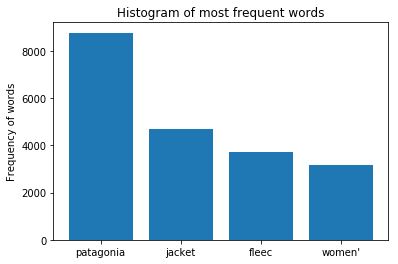

In [11]:
# Bag of words representing count of most common words
import matplotlib.pyplot as plt
from operator import itemgetter 

def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for string in my_list: 
        for word in string:
            if (word in freq): 
                freq[word] += 1
            else: 
                freq[word] = 1
    return(freq)

hist_dict = CountFrequency(filtered_lst)
N = 4

res = dict(sorted(hist_dict.items(), key = itemgetter(1), reverse = True)[:N])
#plt.hist(hist_dict, bins=5)
#plt.show()
plt.bar(res.keys(), res.values())
plt.ylabel('Frequency of words')
plt.title('Histogram of most frequent words')
plt.show()

In [12]:
pd.DataFrame(corpus0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,patagonia,women,nano,puff,coat,jacket,maroon,sz,medium,no,hole,/,stain,None,None,None,None
1,patagonia,women',quilt,worn,wear,1/4,snap,pull,"over,",size,m,organ,cotton,None,None,None,None
2,patagonia,synchilla,snap,t,fleec,pullov,women,gray,None,None,None,None,None,None,None,None,None
3,women',patagonia,size,l,re-tool,snap,fleec,pullov,sweater,pocket,purpl,None,None,None,None,None,None
4,patagonia,women',gray,fuzzi,vest,full,zip,size,small,None,None,None,None,None,None,None,None
5,patagonia,women',long,sleev,sweater,1/4,zip,black,medium,None,None,None,None,None,None,None,None
6,nwt,xx,&,xs,women,patagonia,better,sweater,None,None,None,None,None,None,None,None,None
7,patagonia,lo,gato,fleec,vest,women',sz,m,dark,gray,None,None,None,None,None,None,None
8,$199,nwt,patagonia,w',nano,puff,jacket,all,color,sz,xs,s,m,l,xl,None,None
9,patagonia,xl,women,classic,synchilla,fleec,jacket,(gray),-quick,-,free,ship,None,None,None,None,None


In [13]:
# Machine learning models to compare text similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from heapq import nsmallest
from sklearn.feature_extraction.text import TfidfVectorizer

# Create corpus matrix where index 0 = base case, and every row following is eBay API text
corpus = [base_filtered]

for corp in filtered_lst:
    join_sent = ' '.join(corp)
    corpus.append(join_sent)
    

### Start machine learning to compare similarity of sentences

# 1. Euclidean_distances

vectorizer = CountVectorizer()
features = vectorizer.fit_transform(corpus).todense()
distances = []

for i, f in enumerate(features):
    # Find euclidean distance to the test phrase
    distances.append(euclidean_distances(features[0], f))


num_distances = []
for i in distances:
    num_distances.append(float(i))


# 2. Cosine Distance w/ TfidfVectorizer
vect = TfidfVectorizer()

# Create cosine_sim function to find cosine similarity between titles
def cosine_sim(text1, text2):
    tfidf = vect.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

# Make list of cosine_sim values to corpus compared to base0
cosine_vals = []
for i, val in enumerate(corpus):
    # Cosine_sim compared to base0
    cos_val = cosine_sim(base_filtered, val)
    cosine_vals.append(cos_val)
    
    
# Print compared sentence
print("base case: " + base_filtered)

base case: patagonia women' nano puff® jacket


In [14]:
### Create data frame of lists to compare machine learning measurements for text mining

# Method 1: Euclidean distances values

# Remove base case from corpus result and store as corpus_w0 and same for distances as num_distances_w0
corpus_w0 = corpus[1:]
num_distances_w0 = num_distances[1:]

# Create data frame
my_df = {
    'titles': titles,
    'prices': my_value,
    'corpus': corpus_w0,
    'distances': num_distances_w0
}
my_pd = pd.DataFrame(my_df)


# Method 2: Cosine Distance
cosine_vals_w0 = cosine_vals[1:]

cosine_df = {
    'titles' : titles,
    'prices' : my_value,
    'corpus' : corpus_w0,
    'cosine_vals' : cosine_vals_w0,
    'ebay_url': ebay_url,
    'image_url' : image_url
}


cosine_pd = pd.DataFrame(cosine_df)

# Convert cosine_vals and prices to float
cosine_pd['prices'] = cosine_pd['prices'].astype(float)
cosine_pd['ebay_url'] = cosine_pd['ebay_url'].astype(str)
cosine_pd['image_url'] = cosine_pd['image_url'].astype(str)

# Price of Old Navy base ** Change p0! **
p0 = 199.00
# Create new column that includes prices difference to original
cosine_pd['price_diff'] = p0 - cosine_pd['prices']


# Print out resulting filtered df
print("base case: " + base_filtered)
    
cosine_pd.nlargest(5, 'cosine_vals')

NameError: name 'my_value' is not defined

In [22]:
criteria = cosine_pd['price_diff'] > 0.0
criteria.head()

non_zero_price_diff = cosine_pd[criteria]

non_zero_price_diff.nlargest(5, 'cosine_vals')

,titles,prices,corpus,cosine_vals,ebay_url,image_url,price_diff
35,Patagonia Womens Nano Puff Jacket Size M,79.95,patagonia women nano puff jacket size,0.846647,['https://www.ebay.com/itm/Patagonia-Womens-Na...,[https://thumbs3.ebaystatic.com/m/mEoVwX3heHCa...,119.05
28,Patagonia Women's Nano Puff Jacket in Black Sz...,159.20,patagonia women' nano puff jacket black sz. xs...,0.544702,['https://www.ebay.com/itm/Patagonia-Womens-Na...,[https://thumbs1.ebaystatic.com/pict/04040_0.jpg],39.80
71,Patagonia Women's Nano Puff Jacket in Black Sz...,159.20,patagonia women' nano puff jacket black sz. xs...,0.544702,['https://www.ebay.com/itm/Patagonia-Womens-Na...,[https://thumbs3.ebaystatic.com/pict/124028167...,39.80
34,Patagonia Nano Puff Bivy Pullover Elwha Blue M...,109.99,patagonia nano puff bivi pullov elwha blue med...,0.439275,['https://www.ebay.com/itm/Patagonia-Nano-Puff...,[https://thumbs4.ebaystatic.com/m/m2uPxDQAhVz9...,89.01
60,Patagonia Nano Puff Bivy Pullover Elwha Blue M...,109.99,patagonia nano puff bivi pullov elwha blue med...,0.439275,['https://www.ebay.com/itm/Patagonia-Nano-Puff...,[https://thumbs4.ebaystatic.com/m/m2uPxDQAhVz9...,89.01


In [124]:
### Price Comparison Analysis

# Extract highest match of ebay_url
non_zero_price_diff.nlargest(5,'cosine_vals')['ebay_url'][3913]

"['https://www.ebay.com/itm/Womens-Patagonia-Nano-Puff-Jacket-Black-L-/274200840269']"

In [55]:
# Sort data frame by highest cosine values

final_df = non_zero_price_diff.sort_values(by=['cosine_vals'], ascending=False)

eBay_Series = final_df['ebay_url']

clean_url = []

for string in eBay_Series:
    clean_url.append(string[2:len(string)-2])
    
final_df['clean_url'] = clean_url

final_df.drop(['ebay_url'], axis=1)

final_df

,titles,prices,corpus,cosine_vals,ebay_url,image_url,price_diff,clean_url
35,Patagonia Womens Nano Puff Jacket Size M,79.95,patagonia women nano puff jacket size,0.846647,['https://www.ebay.com/itm/Patagonia-Womens-Na...,[https://thumbs3.ebaystatic.com/m/mEoVwX3heHCa...,119.05,https://www.ebay.com/itm/Patagonia-Womens-Nano...
71,Patagonia Women's Nano Puff Jacket in Black Sz...,159.20,patagonia women' nano puff jacket black sz. xs...,0.544702,['https://www.ebay.com/itm/Patagonia-Womens-Na...,[https://thumbs3.ebaystatic.com/pict/124028167...,39.80,https://www.ebay.com/itm/Patagonia-Womens-Nano...
28,Patagonia Women's Nano Puff Jacket in Black Sz...,159.20,patagonia women' nano puff jacket black sz. xs...,0.544702,['https://www.ebay.com/itm/Patagonia-Womens-Na...,[https://thumbs1.ebaystatic.com/pict/04040_0.jpg],39.80,https://www.ebay.com/itm/Patagonia-Womens-Nano...
60,Patagonia Nano Puff Bivy Pullover Elwha Blue M...,109.99,patagonia nano puff bivi pullov elwha blue med...,0.439275,['https://www.ebay.com/itm/Patagonia-Nano-Puff...,[https://thumbs4.ebaystatic.com/m/m2uPxDQAhVz9...,89.01,https://www.ebay.com/itm/Patagonia-Nano-Puff-B...
34,Patagonia Nano Puff Bivy Pullover Elwha Blue M...,109.99,patagonia nano puff bivi pullov elwha blue med...,0.439275,['https://www.ebay.com/itm/Patagonia-Nano-Puff...,[https://thumbs4.ebaystatic.com/m/m2uPxDQAhVz9...,89.01,https://www.ebay.com/itm/Patagonia-Nano-Puff-B...
70,Patagonia Nano Puff Bivy Pullover Carve Coral ...,124.99,patagonia nano puff bivi pullov carv coral lar...,0.439275,['https://www.ebay.com/itm/Patagonia-Nano-Puff...,[https://thumbs4.ebaystatic.com/m/m-Nu0kEgQBc0...,74.01,https://www.ebay.com/itm/Patagonia-Nano-Puff-B...
49,Patagonia Better Sweater Jacket Women's,119.00,patagonia better sweater jacket women',0.431613,['https://www.ebay.com/itm/Patagonia-Better-Sw...,[https://thumbs4.ebaystatic.com/pict/153706972...,80.00,https://www.ebay.com/itm/Patagonia-Better-Swea...
36,Patagonia Better Sweater Jacket Women's,119.00,patagonia better sweater jacket women',0.431613,['https://www.ebay.com/itm/Patagonia-Better-Sw...,[https://thumbs4.ebaystatic.com/pict/153706972...,80.00,https://www.ebay.com/itm/Patagonia-Better-Swea...
9,Patagonia Better Sweater Jacket Women's,119.00,patagonia better sweater jacket women',0.431613,['https://www.ebay.com/itm/Patagonia-Better-Sw...,[https://thumbs1.ebaystatic.com/pict/04040_0.jpg],80.00,https://www.ebay.com/itm/Patagonia-Better-Swea...
67,Patagonia Better Sweater Jacket Women's,119.00,patagonia better sweater jacket women',0.431613,['https://www.ebay.com/itm/Patagonia-Better-Sw...,[https://thumbs4.ebaystatic.com/pict/153706972...,80.00,https://www.ebay.com/itm/Patagonia-Better-Swea...


In [57]:
# Create json file to send to Andrew with each key as individ value: 'records'
d = final_df.to_dict(orient='records')
j = json.dumps(d)

# File sent to python_notes as 'ebay.json'
with open('ebay.json','w') as json_file:
    json.dump(d, json_file)

# Create csv file of dataframe and save in Python_Notes folder
final_df.to_csv(r'/Users/maxg/Desktop/Python_Notes/ebay.csv')